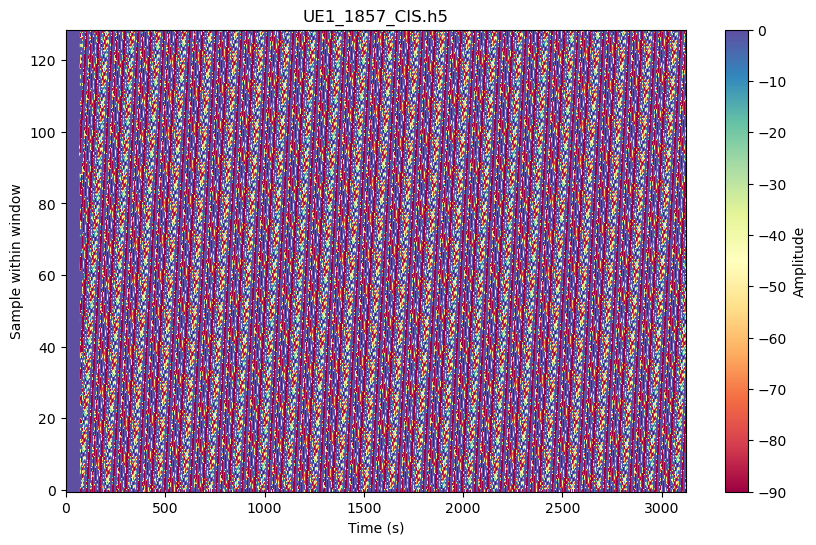

In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

# Define the directory where the files are located
directory = '/home/migue/Desktop/programs/spectrogram/database/'

# List all .h5 files in the directory
files = glob.glob(os.path.join(directory, '*.h5'))

fs = 40e6

sampling_rate = fs  # samples per second

# Loop through each file
for file_path in files:
    with h5py.File(file_path, 'r') as file:
        # Access the dataset
        data = np.array(file['CIR/CIR1'])
        
        # Read the data into a NumPy array
        
    
    # Create a time array
    num_rows, num_samples_per_row = data.shape
    total_samples = num_rows * num_samples_per_row
    time_array = np.arange(total_samples) / sampling_rate  # Time in seconds
    
    # Adjust time_array to match the shape of data for plotting
    
    
    # Assuming you want to plot the first row (first 4096 samples = first 10 ms)
    first_row_time = time_array[0]  # Time values for the first row
    
    # Adjust the plot
    plt.figure(figsize=(10, 6))
    plt.imshow(data.T, aspect="auto", cmap="Spectral", origin='lower', interpolation='bicubic',vmin=-90,vmax = 0)
    plt.colorbar(label='Amplitude')
    
    plt.xlabel('Time (s)')
    plt.ylabel('Sample within window')
    plt.title(os.path.basename(file_path))  # Use the file name as the title
    plt.show()

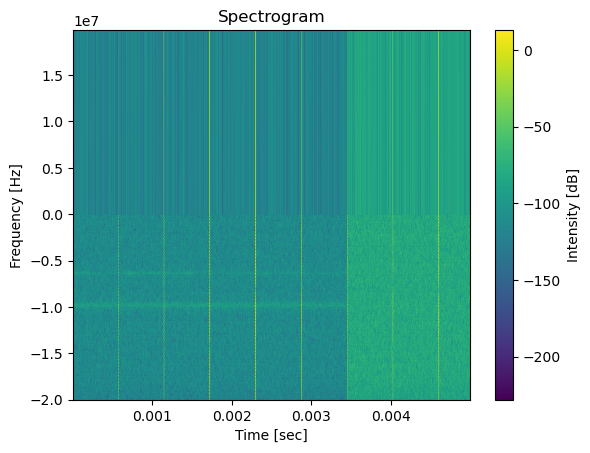

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Step 1: Define the file path and data type
file_path = './IQbin/UE1-0503-1.dat'
data_type = np.int16 # Change this according to your data

# Step 2: Read the IQ data
file_path = './IQbin/UE1-0503-1859.dat'
data_type = np.int16  # Change this according to your data

# Step 2: Read the IQ data (first 200,000 samples, skipping the first 64 bits)
with open(file_path, 'rb') as f:
    f.seek(8)  # Skip the first 64 bits (8 bytes)
    # Read 200,000 samples for I and Q (400,000 readings total)
    iq_data = np.fromfile(f, dtype=data_type, count=200000*2)

# Step 3: Separate I and Q components
i_data = iq_data[0::2]
q_data = iq_data[1::2]

# Step 4: Combine I and Q into a complex array
complex_signal = i_data + 1j*q_data

# Step 5: Compute the spectrogram
frequencies, times, Sxx = spectrogram(complex_signal, fs=40e6, window = "hamming",nperseg=256,nfft=256,noverlap=128)   # Adjust the sampling frequency (fs) as needed

# Step 6: Plot the spectrogram
plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Sxx)), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()

# Results

The following plots were printed from the C++ spectrogram file these ten outputs are subsequnetly about 10ms each and following one after the other. The outputs were developed 
to be get the independent signal through array division to remove the CIR factor from the system
## HDF5
The resulting functions were saved to an hdf5 file for use by the AI machine learning.


